In [1]:
# %load spectral.py
#!/usr/bin/env python
%reload_ext autoreload
import os 
clear = lambda: os.system('cls')  # On Windows System
os.system('clear')
clear()

32512

In [2]:
# %load spectral.py
#!/usr/bin/env python

#import os
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import os.path
#%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns 
import cmocean
import sys
import palettable
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker
import ioeddy as io
import math
import json
from scipy.interpolate import interp1d
#from ioeddy import readpln

# -----------------------------------------------------------------------------------------
# specify path of the pln files
#path = '/work1/3d_hill_cases_postprocess/OM_simulations/SL_SL/Fr02/Plnfiles_mean/Plnfiles/'
path = '../Plnfiles/'
stride = 100
# preferred plot range
pref_x=[-1500,5000]
pref_y=[0,1200]
num_files = 10000
drhodz = 0
save_file = True

# ------------------------------------------------------------------------------------------
# The specific file number start
file_number = 70400 #68300
file_header_1= 'V0_j0513' + '_n'
# ----------------------------------------------------------------------------------------



# Problem specific
# supply (x,y) values
# x-  streamwise and y - vertical
probe_loc = [[300,25] ,[500, 25], [ 1000.0, 25], [2000.0, 25] ,[500.0, 50.0], \
            [500.0, 60.0], [500.0, 70], [500.0, 80], [500, 90], [500.0, 100.0], \
            [6500.0, 37.5],[600.0, 400.0],[600.0, 450.0], [600.0, 500.0], [1000.0, 560.0], [1000.0, 660.0], \
             [1000.0, 460.0], [1000.0, 360.0], [1000.0, 260.0],[4500.0, 130.0],[4500.0, 140.0]]
probe_indices = np.zeros([len(probe_loc),len(probe_loc[0])],dtype=int) 

nprobe = len(probe_loc)
time = np.zeros((num_files,), dtype=int)
probe_data = np.zeros((nprobe,num_files))

for i in range(len(probe_loc)):
    print(i , " . " , "Probe locations : x=", probe_loc[i][0]," and y=" , probe_loc[i][1])
    



0  .  Probe locations : x= 300  and y= 25
1  .  Probe locations : x= 500  and y= 25
2  .  Probe locations : x= 1000.0  and y= 25
3  .  Probe locations : x= 2000.0  and y= 25
4  .  Probe locations : x= 500.0  and y= 50.0
5  .  Probe locations : x= 500.0  and y= 60.0
6  .  Probe locations : x= 500.0  and y= 70
7  .  Probe locations : x= 500.0  and y= 80
8  .  Probe locations : x= 500  and y= 90
9  .  Probe locations : x= 500.0  and y= 100.0
10  .  Probe locations : x= 6500.0  and y= 37.5
11  .  Probe locations : x= 600.0  and y= 400.0
12  .  Probe locations : x= 600.0  and y= 450.0
13  .  Probe locations : x= 600.0  and y= 500.0
14  .  Probe locations : x= 1000.0  and y= 560.0
15  .  Probe locations : x= 1000.0  and y= 660.0
16  .  Probe locations : x= 1000.0  and y= 460.0
17  .  Probe locations : x= 1000.0  and y= 360.0
18  .  Probe locations : x= 1000.0  and y= 260.0
19  .  Probe locations : x= 4500.0  and y= 130.0
20  .  Probe locations : x= 4500.0  and y= 140.0


In [3]:
filename_1   =  path + file_header_1 + '%08d'%file_number + '.pln'
print(filename_1)
exists = os.path.isfile(filename_1)
if not exists:
    print('Broken')
    

    # Function ioeddy has been used for pln read
my_plane_1 = io.readpln(filename_1)

# The nx and ny values
# x is always streamwise
# y is always vertical
# Only for plotting purposes

np1    = my_plane_1['np1'   ][0]
np2    = my_plane_1['np2'   ][0]

#grid
# 

gc1 = my_plane_1['gc1'][0]
gc2 = my_plane_1['gc2'][0]

#data
# yedges has the spatial coordinates of 2nd grid
yedges = gc1
# xedges has the spatial coordinates of 1st grid
xedges = gc2
# These are different from conventions used in the code. 
# Just for temporary plotting
for i in range(len(probe_indices)):
    probe_indices[i][0]= io.loc(probe_loc[i][0],xedges)
    probe_indices[i][1]= io.loc(probe_loc[i][1],yedges)
    print(i, " . ","Probe locations : i=", probe_indices[i][0]," and j=" , probe_indices[i][1])

../Plnfiles/V0_j0513_n00070400.pln
Reading correct
0  .  Probe locations : i= 576  and j= 21
1  .  Probe locations : i= 686  and j= 21
2  .  Probe locations : i= 960  and j= 21
3  .  Probe locations : i= 1226  and j= 21
4  .  Probe locations : i= 686  and j= 42
5  .  Probe locations : i= 686  and j= 50
6  .  Probe locations : i= 686  and j= 59
7  .  Probe locations : i= 686  and j= 67
8  .  Probe locations : i= 686  and j= 75
9  .  Probe locations : i= 686  and j= 84
10  .  Probe locations : i= 1520  and j= 32
11  .  Probe locations : i= 741  and j= 241
12  .  Probe locations : i= 741  and j= 252
13  .  Probe locations : i= 741  and j= 261
14  .  Probe locations : i= 960  and j= 271
15  .  Probe locations : i= 960  and j= 285
16  .  Probe locations : i= 960  and j= 254
17  .  Probe locations : i= 960  and j= 231
18  .  Probe locations : i= 960  and j= 198
19  .  Probe locations : i= 1436  and j= 109
20  .  Probe locations : i= 1436  and j= 117


In [4]:
count = 0
while True:

    
    dirext = ''

    
    filename_1   =  path + file_header_1 + '%08d'%file_number + '.pln'
    print(filename_1)
    exists = os.path.isfile(filename_1)
    if not exists:
        print('Broken')
        count = count -1
        break

    # Function ioeddy has been used for pln read

    my_plane_1 = io.readpln(filename_1)

    # The nx and ny values
    # x is always streamwise
    # y is always vertical
    # Only for plotting purposes

    np1    = my_plane_1['np1'   ][0]
    np2    = my_plane_1['np2'   ][0]

    #grid
    # 

    gc1 = my_plane_1['gc1'][0]
    gc2 = my_plane_1['gc2'][0]
     
    # time
    time[count] =my_plane_1['time'][0]
    
    #data
    raw_data_1 = my_plane_1['data'][0]

    data_1 = np.reshape(raw_data_1,(np1,np2),order='F')

    # yedges has the spatial coordinates of 2nd grid
    yedges = gc1
    # xedges has the spatial coordinates of 1st grid
    xedges = gc2


    for i in range(nprobe):
        probe_data[i][count] = data_1[ probe_indices[i][1] ][ probe_indices[i][0] ]


    file_number=file_number+stride  



#    plt.show()
    count = count+1 
    if count >= num_files:
        print('Count exceeds num_files')
        save_file = True
        count = count -1
        break
        

../Plnfiles/V0_j0513_n00070400.pln
Reading correct
../Plnfiles/V0_j0513_n00070500.pln
Reading correct
../Plnfiles/V0_j0513_n00070600.pln
Reading correct
../Plnfiles/V0_j0513_n00070700.pln
Reading correct
../Plnfiles/V0_j0513_n00070800.pln
Reading correct
../Plnfiles/V0_j0513_n00070900.pln
Reading correct
../Plnfiles/V0_j0513_n00071000.pln
Reading correct
../Plnfiles/V0_j0513_n00071100.pln
Reading correct
../Plnfiles/V0_j0513_n00071200.pln
Reading correct
../Plnfiles/V0_j0513_n00071300.pln
Reading correct
../Plnfiles/V0_j0513_n00071400.pln
Reading correct
../Plnfiles/V0_j0513_n00071500.pln
Reading correct
../Plnfiles/V0_j0513_n00071600.pln
Reading correct
../Plnfiles/V0_j0513_n00071700.pln
Reading correct
../Plnfiles/V0_j0513_n00071800.pln
Reading correct
../Plnfiles/V0_j0513_n00071900.pln
Reading correct
../Plnfiles/V0_j0513_n00072000.pln
Reading correct
../Plnfiles/V0_j0513_n00072100.pln
Reading correct
../Plnfiles/V0_j0513_n00072200.pln
Reading correct
../Plnfiles/V0_j0513_n00072300.

Reading correct
../Plnfiles/V0_j0513_n00089200.pln
Reading correct
../Plnfiles/V0_j0513_n00089300.pln
Reading correct
../Plnfiles/V0_j0513_n00089400.pln
Reading correct
../Plnfiles/V0_j0513_n00089500.pln
Reading correct
../Plnfiles/V0_j0513_n00089600.pln
Reading correct
../Plnfiles/V0_j0513_n00089700.pln
Reading correct
../Plnfiles/V0_j0513_n00089800.pln
Reading correct
../Plnfiles/V0_j0513_n00089900.pln
Reading correct
../Plnfiles/V0_j0513_n00090000.pln
Reading correct
../Plnfiles/V0_j0513_n00090100.pln
Reading correct
../Plnfiles/V0_j0513_n00090200.pln
Reading correct
../Plnfiles/V0_j0513_n00090300.pln
Reading correct
../Plnfiles/V0_j0513_n00090400.pln
Reading correct
../Plnfiles/V0_j0513_n00090500.pln
Reading correct
../Plnfiles/V0_j0513_n00090600.pln
Reading correct
../Plnfiles/V0_j0513_n00090700.pln
Reading correct
../Plnfiles/V0_j0513_n00090800.pln
Reading correct
../Plnfiles/V0_j0513_n00090900.pln
Reading correct
../Plnfiles/V0_j0513_n00091000.pln
Reading correct
../Plnfiles/V0_

0  .  Probe locations : x= 300  and y= 25
Interpolated grid size: 512


Text(0.05, 0.95, 'x*=0.6')

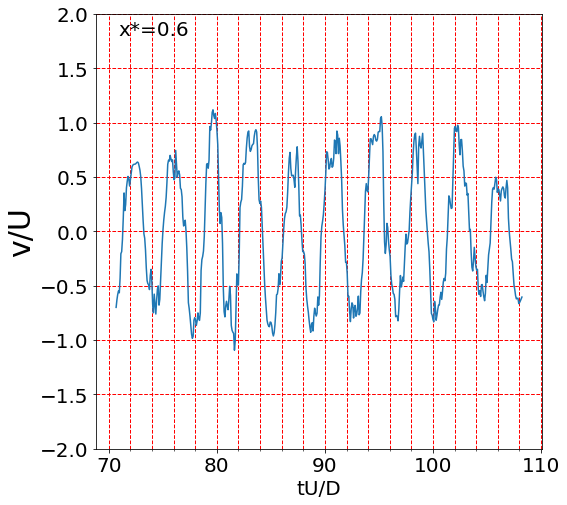

In [5]:
n = 0

print(n, " . ","Probe locations : x=", probe_loc[n][0]," and y=" , probe_loc[n][1])
    
    
window = False
D = 500
U = 0.05

dt= time[1:count]-time[0:count-1]
#plt.plot(time[0:count], probe_data[4][0:count]) 

var = probe_data[n][0:count]


varmean = np.mean(var)
var = var-varmean

dt_min = np.amin(dt)
interpSize = (time[count]-time[0])/dt_min
new_data_size = int(io.nextpow2(interpSize))

time_new = np.linspace(time[0],time[count],num=new_data_size)



var_new = interp1d(time[0:count],var,fill_value="extrapolate") (time_new)

var_new = (var_new + varmean)/U
print('Interpolated grid size:',new_data_size)

fig1, ax1 = plt.subplots(1,1,figsize=(8,8))
ax1.plot(time_new*U/D, var_new)
plt.grid(which='both',axis='both',color='r', linestyle='--', linewidth=1)
ax1.tick_params(axis='x', which='minor', bottom=True,labelsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
#plt.tick_params(axis='both', which='minor', labelsize=8)
ax1.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
plt.xlabel('tU/D', fontsize=20)
plt.ylabel('v/U', fontsize=30)
plt.ylim(-2,2)
plt.annotate('x*='+ str(probe_loc[n][0]/D), xy=(0.05, 0.95), xycoords='axes fraction',fontsize=20)
#fig1.savefig('Probe'+str(n)+'.png')
#fig1.savefig('Probe'+str(n)+'.png')

511.0
1.0


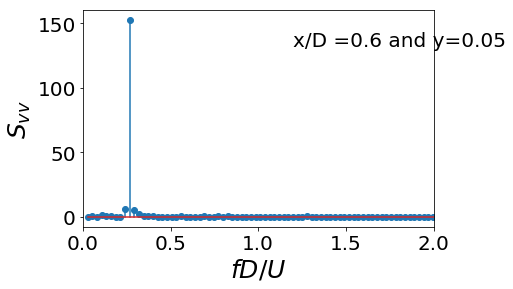

In [6]:
omega_f = U/D
dt_new = time_new[1]-time_new[0]
Fs = 1/dt_new

print(np.rint((time_new[-1]-time_new[0])*Fs))
nfft = int(np.rint((time_new[-1]-time_new[0])*Fs))
print(Fs*dt_new)
out = "x/D =" + str(probe_loc[n][0]/D) + " and y=" + str(probe_loc[n][1]/D)
if (window) :
    w = np.hanning(new_data_size)
    var_new = np.multiply(var_new,w)
   
# Y = np.fft.fft(var_new)
# P_two = abs(Y)#2*np.multiply(Y,np.conjugate(Y))/(new_data_size*Fs)

# S_uu = P_two[1: int(new_data_size/2)+1]
# f = Fs*range(int(new_data_size/2))/new_data_size


# Use FFT to get the amplitude of the spectrum
ampl = 2/nfft * (np.absolute(np.fft.fft(var_new)))**2

# FFT frequency bins
freqs = np.fft.fftfreq(nfft, 1/Fs)
freqs = np.fft.fftshift(freqs)/omega_f
ampl = np.fft.fftshift(ampl[0:nfft])
ind = freqs > 0

real_freq = freqs[ind]
real_ampl = ampl[ind]

#print(f)
plt.stem(real_freq, real_ampl)
ax = plt.gca()
#plt.margins(0.1, 0.1)
plt.xlabel('$fD/U$', fontsize=25)
plt.ylabel('$S_{vv}$', fontsize=25)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlim(0,2)
plt.text(0.6, 0.9,out,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes,fontsize=20)
#plt.gcf().savefig('./' + 'Svv_stem' + '_Pr' + str(n) + '.png')
plt.show()

Probe locations : x/D = 0.6  and y= 0.05


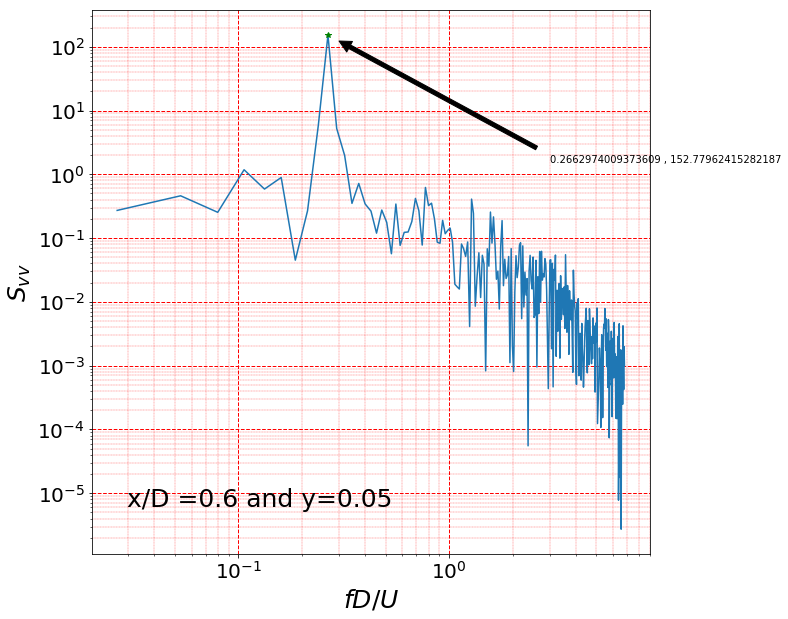

In [7]:


fig2, ax2 = plt.subplots(1,1,figsize=(10,10))
i = np.unravel_index(np.argmax(real_ampl, axis=None), real_ampl.shape)

ax2.loglog(real_freq,real_ampl)
ax2.loglog(real_freq[i],real_ampl[i],'g*')
plt.grid(which='major',axis='both',color='r', linestyle='--', linewidth=1)
plt.grid(which='minor',axis='both',color='r', linestyle='--', linewidth=.3)
ax2.annotate(str(real_freq[i])+' , '+str(real_ampl[i]), xy=(real_freq[i],real_ampl[i]), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05,clip_on=True),
            )
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('$ fD/U$', fontsize=25)
plt.ylabel('$S_{vv}$', fontsize=25)


print("Probe locations : x/D =", probe_loc[n][0]/D," and y=" , probe_loc[n][1]/D)

plt.text(0.3, 0.1,out,horizontalalignment='center',verticalalignment='center',
     transform = ax2.transAxes,fontsize=25)
fig2.savefig('./' + 'Spectra' + '_Pr' + str(n) + '.png')

In [8]:

# Save the array back to the file
# change filename


filename1 = 'nosl_var_time.csv' 
f1 = open(filename1, 'w')
for i in range(len(time_new)):
    f1.write("%10.8e \t %10.8e\n" % (time_new[i], var_new[i]))
f1.close()

filename1 = 'nosl_fftvar.csv' 
f2 = open(filename1, 'w')
for i in range(len(S_uu)):
    f2.write("%10.8e \t %10.8e\n" % (freq[i], np.real(S_uu[i])))
f2.close()



NameError: name 'S_uu' is not defined

In [ ]:
print(f)

In [ ]:
# ------------------------------------------------------------------------------------------

#os.environ['PATH'] = os.environ['PATH'] + ':/Library/TeX/texbin/'


fss = 12; 
fsl = 15; 
# This is just set up for plotting the figure
#
sns.set_context('paper')
sns.set(color_codes=True, font_scale=20)

sns.set_palette('PuBuGn_d')
sns.set_style('ticks', {'font.family'     : ['serif'],
                        'font.serif'      : ['Times'],
                        'xtick.major.size': 20.0,
                        'xtick.minor.size': 15,
                        'ytick.major.size': 20,
                        'ytick.minor.size': 15,
                        'axes.edgecolor'  : 'k',
                        'axes.labelcolor' : 'k',
                        'text.color'      : 'k',
                        'xtick.color'     : 'k',
                        'ytick.color'     : 'k',
                        'image.cmap'      : 'PuBuGn'})

# This is just set up for plotting the figure
#

plt.rc('figure', figsize=[8.0, 5.0])

plt.rc('mathtext', fontset='stix')

plt.rc('axes', linewidth=1.0)
plt.rc('xtick.major', width=1.0)
plt.rc('ytick.major', width=1.0)
plt.rc('xtick.minor', width=1.0)
plt.rc('ytick.minor', width=1.0)

plt.rc('font', size=fss)
plt.rc('xtick', labelsize=fss)
plt.rc('ytick', labelsize=fss)
plt.rc('axes', labelsize=fsl)

plt.rc('axes', titlesize=fss)
plt.rc('lines', linewidth=2.0)
plt.rc('lines', markersize=7.0)

plt.rc('pdf', fonttype=3)
plt.rc('ps', fonttype=3)
plt.rc('text', usetex=True)

plt.rc('font',**{'family':'serif','serif':['Times']})

plt.rc('text.latex', preamble=[r"\usepackage[T1]{fontenc}", r"\usepackage{amsmath}"])